In [14]:
import cv2

In [21]:
img_path='/home/lab/cocodataset/train2017/train2017/000000'
jpg='.jpg'

In [16]:
img=cv2.imread(img_path)

In [17]:
import matplotlib.pyplot as plt

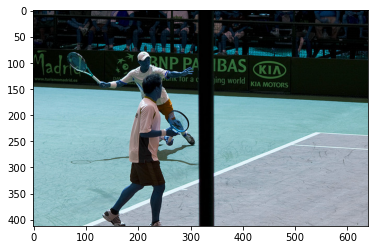

In [18]:
plt.imshow(img)

# Check JSON File

In [6]:
import os
result=[]
def search(dirname):
    try:
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename):
                search(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.json': 
                    print(full_filename)
                    result.append(full_filename)
    except PermissionError:
        pass

search("/home/lab/cocodataset/annotations")

/home/lab/cocodataset/annotations/annotations/captions_val2017.json
/home/lab/cocodataset/annotations/annotations/instances_train2017.json
/home/lab/cocodataset/annotations/annotations/instances_val2017.json
/home/lab/cocodataset/annotations/annotations/stuff_train2017.json
/home/lab/cocodataset/annotations/annotations/stuff_val2017.json
/home/lab/cocodataset/annotations/annotations/image_info_test-dev2017.json
/home/lab/cocodataset/annotations/annotations/person_keypoints_val2017.json
/home/lab/cocodataset/annotations/annotations/image_info_test2017.json
/home/lab/cocodataset/annotations/annotations/person_keypoints_train2017.json
/home/lab/cocodataset/annotations/annotations/image_info_unlabeled2017.json
/home/lab/cocodataset/annotations/annotations/captions_train2017.json


In [7]:
import json
with open('/home/lab/cocodataset/annotations/annotations/person_keypoints_train2017.json') as json_file:
    json_data=json.load(json_file)

In [8]:
json_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [131]:
json_data['categories'][0]['keypoints']

['nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

In [119]:
bbox=json_data['annotations'][1253]['bbox']
img_id=str(json_data['annotations'][1253]['image_id'])
kp=json_data['annotations'][1253]['keypoints']

In [120]:
img=cv2.imread(img_path+img_id+jpg)

In [121]:
bbox

[552.22, 41.58, 69.73, 58.98]

In [122]:
def make_keypoint(keypoint):
    list_kp=[]
    if int(len(keypoint)/3) != len(keypoint)/3:
        print("NO Matching")
        sys.exit()
        
    for i in range(int(len(keypoint)/3)):
        coordinate=[]
        x=keypoint[i*3]
        y=keypoint[i*3+1]
        v=keypoint[i*3+2]
        coordinate.append(x)
        coordinate.append(y)
        coordinate.append(v)
        list_kp.append(coordinate)
    return list_kp

In [123]:
list_kp=make_keypoint(kp)

In [124]:
i_x=int(bbox[0])
i_y=int(bbox[1])
i_w=int(bbox[2])
i_h=int(bbox[3])

In [125]:
new_list=[]
for i in list_kp:
    if i[0]==0 and i[0]== i[1]:
        print("No coordinate")
    else :
        print("Yes coordinate")
        i[0]=i[0]-i_x
        i[1]=i[1]-i_y
    new_list.append(i)

No coordinate
No coordinate
No coordinate
No coordinate
No coordinate
Yes coordinate
Yes coordinate
Yes coordinate
No coordinate
Yes coordinate
No coordinate
Yes coordinate
Yes coordinate
No coordinate
No coordinate
No coordinate
No coordinate


In [126]:
b_img=img[i_y : i_y+i_h , i_x : i_x+i_w]

In [127]:
img.shape, b_img.shape

((429, 640, 3), (58, 69, 3))

In [128]:
new_list

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [21, 21, 2],
 [3, 20, 2],
 [36, 33, 2],
 [0, 0, 0],
 [56, 34, 2],
 [0, 0, 0],
 [19, 56, 2],
 [6, 57, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0]]

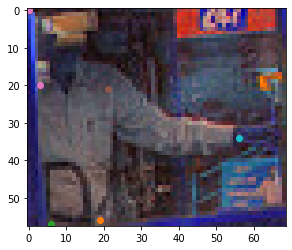

In [129]:
plt.imshow(b_img)
for i in new_list:
    plt.scatter(i[0],i[1])

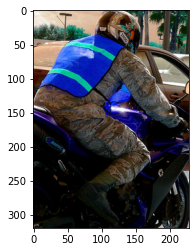

In [43]:
for i in json_data['annotations']:
    print(i['num_keypoints'],i['image_id'], i['keypoints'], i['iscrowd'])
    ids=i['keypoints']
    break

8 537548 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 325, 160, 2, 398, 177, 2, 0, 0, 0, 437, 238, 2, 0, 0, 0, 477, 270, 2, 287, 255, 1, 339, 267, 2, 0, 0, 0, 423, 314, 2, 0, 0, 0, 355, 367, 2] 0


In [33]:
list_kp=[]
for i in range(17):
    coordinate=[]
    x=ids[i*3]
    y=ids[i*3+1]
    v=ids[i*3+2]
    coordinate.append(x)
    coordinate.append(y)
    coordinate.append(v)
    list_kp.append(coordinate)

In [34]:
list_kp

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [325, 160, 2],
 [398, 177, 2],
 [0, 0, 0],
 [437, 238, 2],
 [0, 0, 0],
 [477, 270, 2],
 [287, 255, 1],
 [339, 267, 2],
 [0, 0, 0],
 [423, 314, 2],
 [0, 0, 0],
 [355, 367, 2]]

In [29]:
img_path='/home/lab/cocodataset/train2017/train2017/000000537548.jpg'

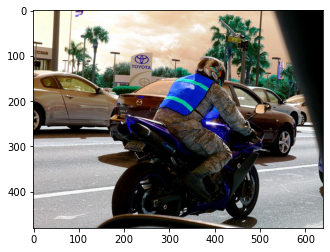

In [30]:
plt.imshow(cv2.imread(img_path))

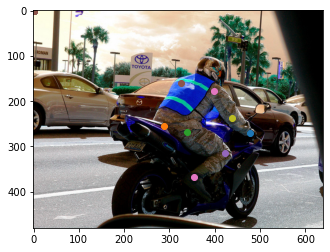

In [38]:
plt.imshow(cv2.imread(img_path))
for i in list_kp:
    plt.scatter(i[0],i[1])

In [40]:
for i in json_data['categories']:
    print(i)

{'supercategory': 'person', 'id': 1, 'name': 'person', 'keypoints': ['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'], 'skeleton': [[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]]}


In [41]:
# v=> 0 Label X (0,0)
# v=> 1 Label O No check
# v=> 2 Label 0 (x,y)